## Project Goals

 A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of 
 chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was 
 defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has 
 hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. 
 They want to know if it is even possible to detect such a difference.


 Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
 In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


 **TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if 
 a wine is "Legit" or "Fraud" based on various chemical features.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/wine_fraud.csv')
print(data.sample(10))
print(data.columns)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
25              6.3              0.39         0.16             1.4      0.080   
1245            7.4              0.55         0.19             1.8      0.082   
2339            6.9              0.39         0.40             4.6      0.022   
5428            7.1              0.44         0.23             5.8      0.035   
959             8.0              0.59         0.05             2.0      0.089   
4028            8.1              0.34         0.28             7.5      0.040   
4980            6.9              0.19         0.35             6.9      0.045   
643             9.5              0.59         0.44             2.3      0.071   
967             8.5              0.66         0.20             2.1      0.097   
4050            6.6              0.56         0.15            10.0      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
25                   11.0      

- Visualization

<Axes: xlabel='quality', ylabel='count'>

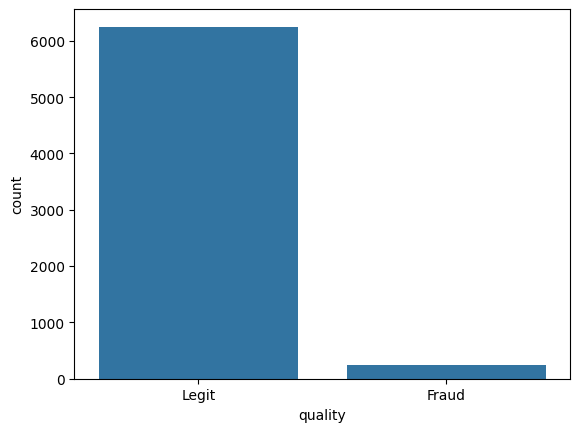

In [2]:
# Comparing record count of legit and fraud
sns.countplot(data=data , x='quality')

<Axes: xlabel='quality', ylabel='count'>

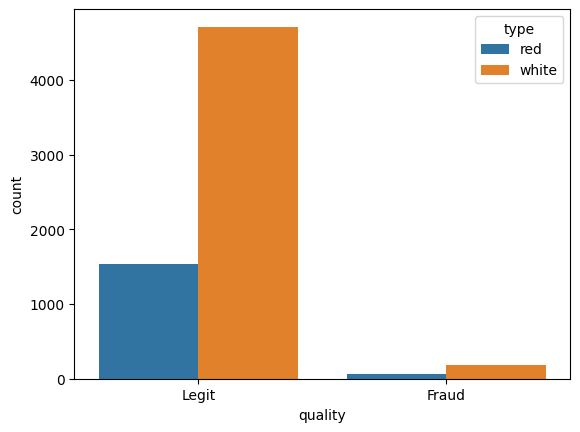

In [3]:
# # Comparing record count of legit and fraud wine types
sns.countplot(data=data , x='quality' , hue='type')


free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
type                   -0.004598
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
quality                 1.000000
Name: quality, dtype: float64


<Axes: >

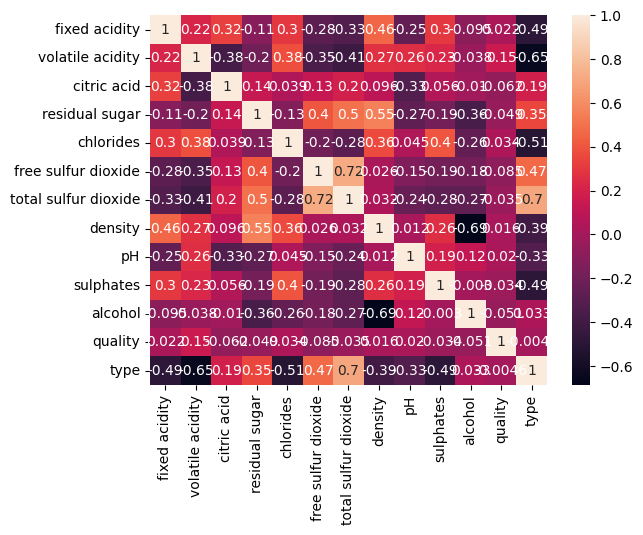

In [4]:
# Correlation of each feature with traget

data['quality'] = data['quality'].map({'Legit':0 , 'Fraud':1})
data['type'] = data['type'].map({'red':0 , 'white':1})
print(data.corr()['quality'].sort_values())

sns.heatmap(data=data.corr() , annot=True)

- Making Model

In [5]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings # for suppressing unecessary warnings

warnings.filterwarnings("ignore", message="degree parameter is only used when kernel is 'poly'")

X = data.drop('quality' , axis=1 )
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
params_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C':[0.1 , 0.2 , 0.3 , 0.4 , 0.5],
    'gamma': [0.01 , 0.02 , 0.03 , 0.04 , 0.05],
    'degree': [x for x in range(20)]
}

# The GridSearch had taken lot of time...
Grid_model = GridSearchCV(estimator=model , param_grid=params_grid , cv=10)
Grid_model.fit(X_train , y_train)


print(Grid_model.best_estimator_)

SVC(C=0.1, degree=11, gamma=0.03, kernel='poly')


Predictions on Test set

In [6]:
from sklearn.metrics import classification_report , confusion_matrix

y_pred = Grid_model.predict(X_test)

print(confusion_matrix(y_test , y_pred))

print(classification_report(y_test , y_pred))

[[1870    2]
 [  76    2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1872
           1       0.50      0.03      0.05        78

    accuracy                           0.96      1950
   macro avg       0.73      0.51      0.51      1950
weighted avg       0.94      0.96      0.94      1950

